In [60]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
class LinearRegression():
    
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, x, y):
        
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        
        self.b = 0
        
        self.x = x
        self.y = y
        
        for i in range(self.no_of_iterations):
            self.updpate_weights()
        
    #function to update weights in gradient descent
    def updpate_weights(self):
        y_prediction = self.predict(self.x)
        
        #calculate gradients
        dw = - ( 2 * ( self.x.T ).dot( self.y -y_prediction )  ) / self.m
        db = - 2 * np.sum( self.y - y_prediction ) / self.m 
        
        #update weight and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self, x):
        return x.dot(self.w) + self.b

In [62]:
data = pd.read_csv('salary_data.csv')
data.shape

(30, 2)

In [63]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# feature selection

In [64]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


# splitting dataset into train and test

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 2)

# model training

In [95]:
model = LinearRegression(learning_rate = 0.02, no_of_iterations = 1000)

In [96]:
model.fit(x_train, y_train)

In [80]:
print(f'weight: {model.w[0]}')
print(f'weight: {model.b}')

weight: nan
weight: nan


In [74]:
prediction = model.predict(x_test)
print(list(prediction))

[36074.641730490905, 34172.05273296542, 66516.0656908987, 58905.70970079675, 91249.72265873004, 80785.48317233985, 101713.96214512021, 52246.64820945755, 42733.70322183011, 88395.8391624418]


In [75]:
print(y_test)

[ 46205  39343  61111  57189  98273  93940 113812  60150  43525  91738]


# visualizing predicted values and actual values

Text(0.5, 1.0, ' Salary vs Experience')

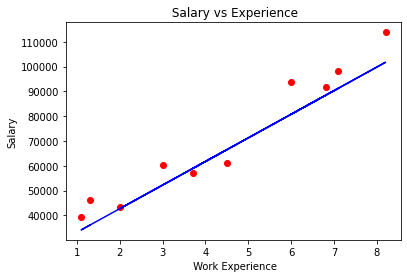

In [76]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, prediction, color = "blue")
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')

In [77]:
print(f'accuracy of model {mse(y_test, prediction, squared=False)}')

accuracy of model 7775.050471391285
